## 📘 **Applications of Explainable AI in Predictive Modelling**  
---

🏫 Week 9   
📅 Date: 2025-04-15  
🧑‍🏫 Irena Zimovska

---



## 📌 **Load libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set pandas to display floats in 4 decimal places (or adjust as desired)
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# Scikit-Learn modules

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_regression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, RidgeCV, LinearRegression

# Metrics
from sklearn.metrics import mean_squared_error

## 📌 **Load data**

In [5]:
# Load the prepared train and test data
X_train = pd.read_csv("../data/processed/X_train_data.csv")
X_test = pd.read_csv("../data/processed/X_test_data.csv")
y_train = pd.read_csv("../data/processed/y_train_data.csv")
y_test = pd.read_csv("../data/processed/y_test_data.csv")

print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape :", X_test.shape, y_test.shape)


Train set shape: (15005, 21) (15005, 1)
Test set shape : (6431, 21) (6431, 1)


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        15005 non-null  float64
 1   bedrooms         15005 non-null  int64  
 2   floors           15005 non-null  float64
 3   waterfront       15005 non-null  int64  
 4   view             15005 non-null  int64  
 5   condition        15005 non-null  int64  
 6   grade            15005 non-null  int64  
 7   zipcode          15005 non-null  int64  
 8   lat              15005 non-null  float64
 9   long             15005 non-null  float64
 10  dist_stop        15005 non-null  float64
 11  ncult            15005 non-null  float64
 12  age              15005 non-null  int64  
 13  since_renovated  15005 non-null  int64  
 14  m2_living        15005 non-null  float64
 15  m2_lot           15005 non-null  float64
 16  m2_above         15005 non-null  float64
 17  m2_basement 

In [7]:
# Store the names of categorical and numeric features separately for future steps 
numeric_features = [col_name for col_name in X_train.columns if col_name != "district_name"]
categorical_features = ['district_name']

## 📌 **Supervised feature selection: recap**


> ⚠️ **Important**  
> In all feature selection procedures, it is good practice to select the features by examining only the training set. This is done to avoid overfitting.

### 🔍 **Wrapper Methods**

- Forward Selection
- Backward Elimination
- Exhaustive Feature Selection
- Recursive Feature Elimination
- Recursive Feature Elimination with Cross-Validation

### 🔍 **Filter Methods**

-  Basic methods
-  Univariate methods
-  Information gain
- Fischer score
- Correlation Matrix with Heatmap

#### Variance Threshold

In [8]:
from sklearn.feature_selection import VarianceThreshold

X_numeric = X_train[numeric_features]

# Instantiate the VarianceThreshold object with a threshold value
threshold = 0.02  # Adjust threshold as needed
selector = VarianceThreshold(threshold)

# Fit the selector to your data
selector.fit(X_numeric)

constant_features = X_numeric.columns[~selector.get_support()]
print("Constant features:", list(constant_features))

Constant features: ['waterfront', 'lat', 'long']


#### Mutual Information

In [9]:
mi_scores = mutual_info_regression(X_numeric, y_train.values.ravel())
mi_scores = pd.Series(mi_scores, index=X_numeric.columns).sort_values(ascending=False)

print("Top features by Mutual Information:")
print(mi_scores)


Top features by Mutual Information:
zipcode           0.3943
m2_living         0.3534
lat               0.3409
grade             0.3395
m2_living15       0.2598
m2_above          0.2493
bathrooms         0.1968
long              0.1115
bedrooms          0.0834
since_renovated   0.0827
age               0.0800
m2_lot15          0.0755
floors            0.0712
m2_lot            0.0664
m2_basement       0.0660
view              0.0588
ncult             0.0241
dist_stop         0.0208
waterfront        0.0119
condition         0.0065
dtype: float64


#### Feature correlations

In [10]:
corr_matrix = X_numeric.corr()
corr_matrix

,bathrooms,bedrooms,floors,waterfront,view,condition,grade,zipcode,lat,long,dist_stop,ncult,age,since_renovated,m2_living,m2_lot,m2_above,m2_basement,m2_living15,m2_lot15
bathrooms,1.0000,0.5065,0.4964,0.0573,0.1878,-0.1237,0.6668,-0.2033,0.0247,0.2221,0.0699,-0.0867,-0.5040,-0.5392,0.7522,0.0901,0.6834,0.2822,0.5677,0.0874
bedrooms,0.5065,1.0000,0.1648,-0.0105,0.0784,0.0385,0.3505,-0.1558,-0.0085,0.1305,0.0013,-0.1122,-0.1473,-0.1619,0.5641,0.0329,0.4669,0.2968,0.3877,0.0295
floors,0.4964,0.1648,1.0000,0.0283,0.0292,-0.2655,0.4607,-0.0540,0.0491,0.1234,0.0458,0.1283,-0.4896,-0.5069,0.3473,-0.0084,0.5184,-0.2486,0.2768,-0.0132
waterfront,0.0573,-0.0105,0.0283,1.0000,0.3987,0.0071,0.0731,0.0316,-0.0149,-0.0369,0.0207,-0.0333,0.0276,0.0050,0.1006,0.0136,0.0700,0.0778,0.0804,0.0298
view,0.1878,0.0784,0.0292,0.3987,1.0000,0.0464,0.2532,0.0818,0.0049,-0.0817,0.0082,-0.0324,0.0547,0.0183,0.2857,0.0812,0.1665,0.2811,0.2815,0.0729
condition,-0.1237,0.0385,-0.2655,0.0071,0.0464,1.0000,-0.1477,0.0012,-0.0109,-0.1041,-0.0439,0.0113,0.3600,0.3955,-0.0609,-0.0040,-0.1628,0.1779,-0.0962,-0.0030
grade,0.6668,0.3505,0.4607,0.0731,0.2532,-0.1477,1.0000,-0.1845,0.1117,0.1976,0.0894,-0.0807,-0.4497,-0.4670,0.7636,0.1081,0.7577,0.1669,0.7120,0.1113
zipcode,-0.2033,-0.1558,-0.0540,0.0316,0.0818,0.0012,-0.1845,1.0000,0.2674,-0.5700,-0.1874,0.2525,0.3466,0.3201,-0.2027,-0.1335,-0.2633,0.0719,-0.2837,-0.1478
lat,0.0247,-0.0085,0.0491,-0.0149,0.0049,-0.0109,0.1117,0.2674,1.0000,-0.1439,-0.1099,0.2050,0.1495,0.1363,0.0533,-0.0949,-0.0006,0.1115,0.0446,-0.0936
long,0.2221,0.1305,0.1234,-0.0369,-0.0817,-0.1041,0.1976,-0.5700,-0.1439,1.0000,0.4326,-0.3013,-0.4077,-0.3809,0.2418,0.2377,0.3473,-0.1475,0.3352,0.2552


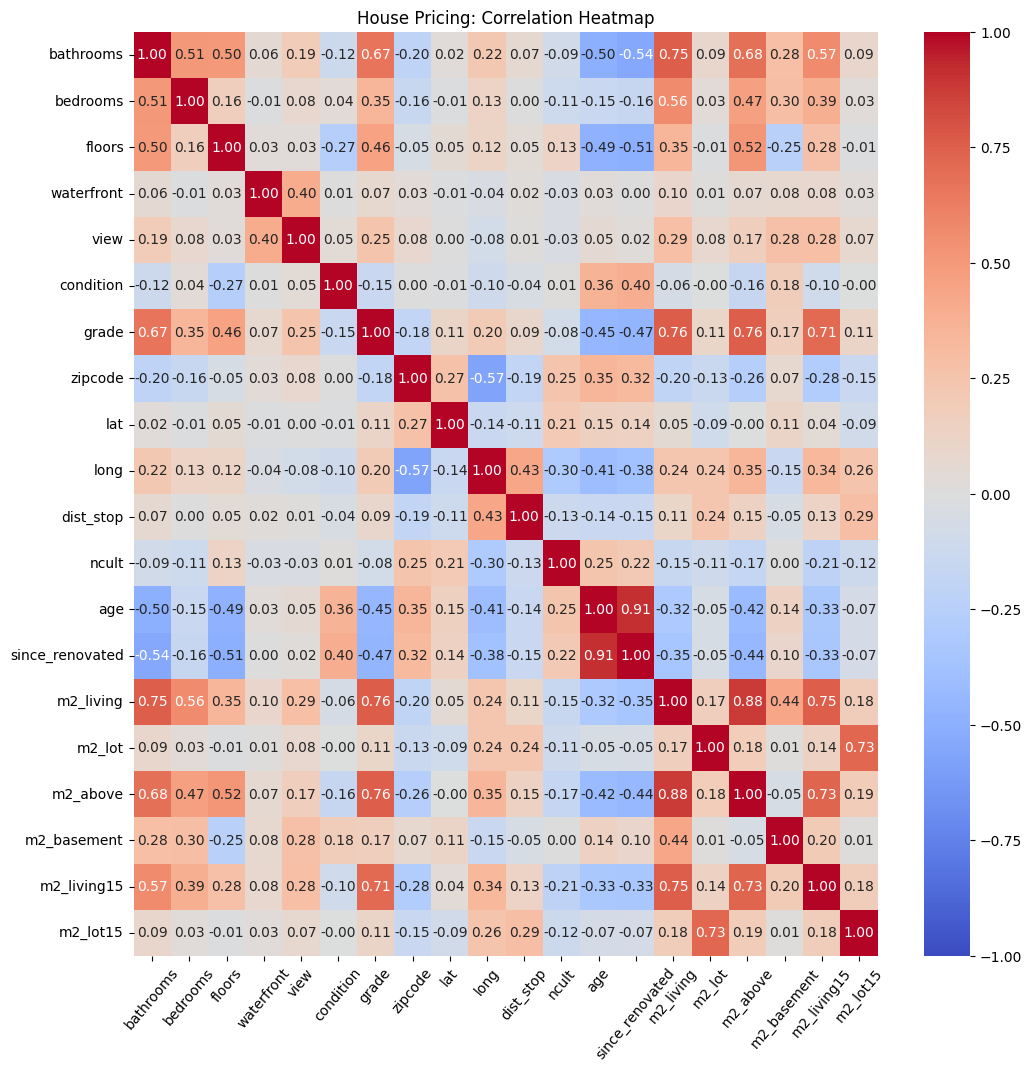

In [11]:
# Create correlation heatmap
plt.figure(figsize=(12,12))
plt.title('House Pricing: Correlation Heatmap')
a = sns.heatmap(corr_matrix, square=False, annot=True, fmt='.2f', linecolor='black', cmap = 'coolwarm', vmin = -1, vmax = 1,)
a.set_xticklabels(a.get_xticklabels(), rotation=50)
a.set_yticklabels(a.get_yticklabels(), rotation=0)           
plt.show() 

⚠️ **Important:**  
Remember, that correlation coefficient measures only the linear relationships and may completely miss out on non-linear ones.

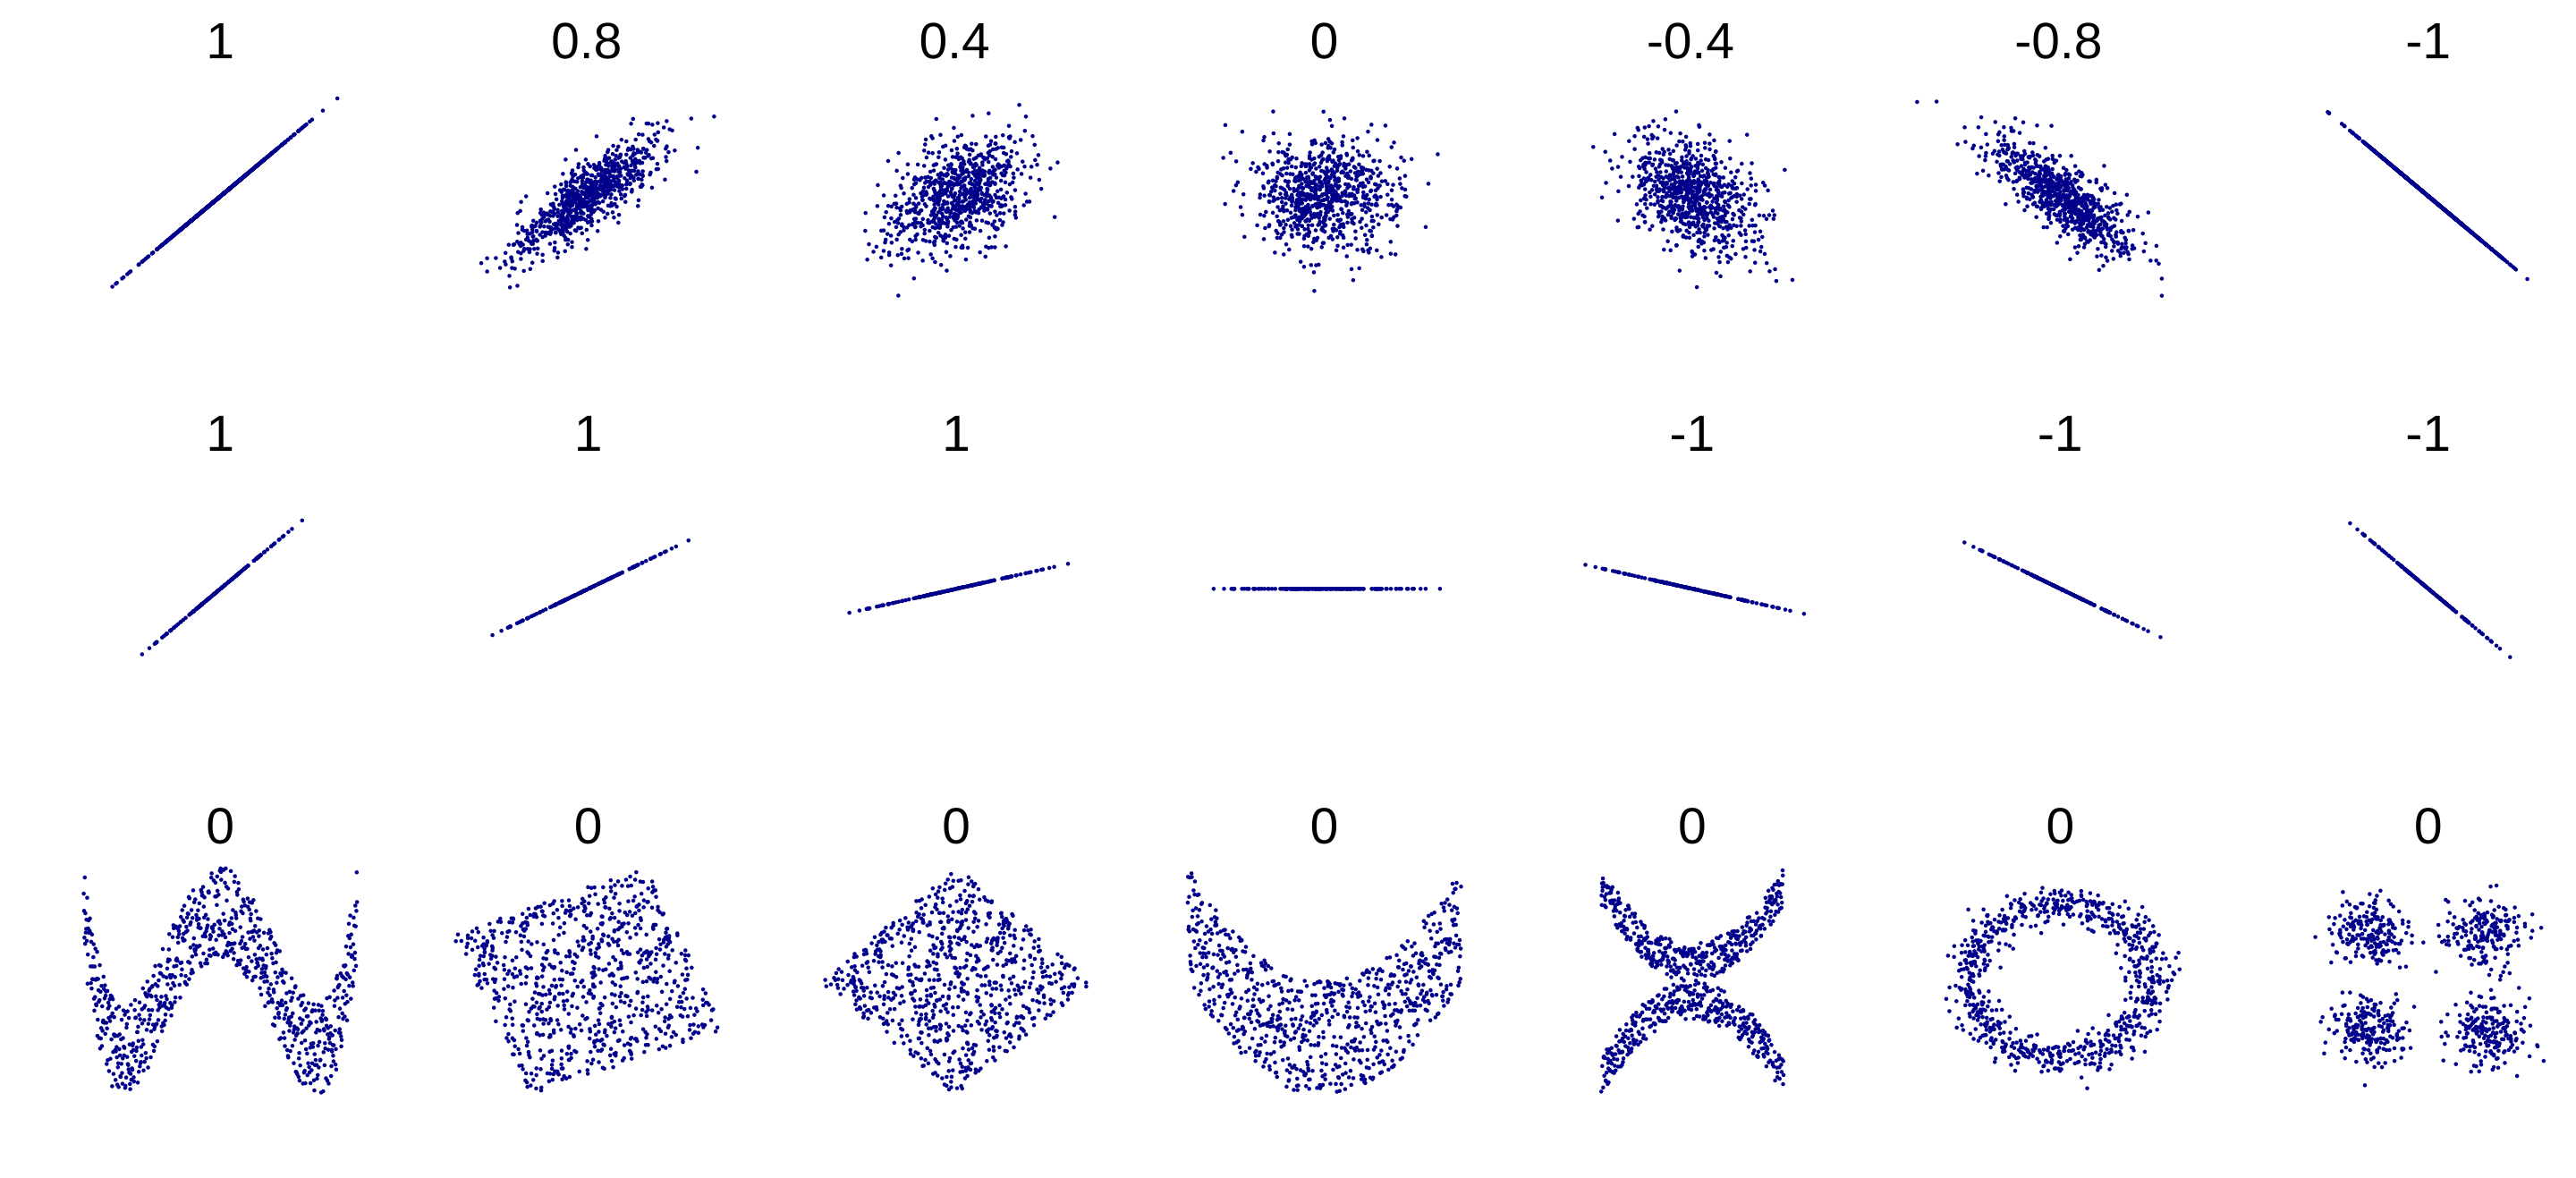

Image source: [Wikipedia](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

In [12]:
# Set the diagonal to 0 to ignore self-correlations
np.fill_diagonal(corr_matrix.abs().values, 0)

# Use an upper triangle mask to avoid duplicate pairs
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(mask)

# Unstack, drop NA values, and sort the pairs by correlation descending
sorted_corr = upper_corr.unstack().dropna().sort_values(ascending=False)

top_pairs = sorted_corr.head(15)

print("Top correlating pairs (absolute correlation values):")
print(top_pairs)

Top correlating pairs (absolute correlation values):
since_renovated  age         0.9083
m2_above         m2_living   0.8762
m2_living        grade       0.7636
m2_above         grade       0.7577
m2_living15      m2_living   0.7543
m2_living        bathrooms   0.7522
m2_living15      m2_above    0.7289
m2_lot15         m2_lot      0.7256
m2_living15      grade       0.7120
m2_above         bathrooms   0.6834
grade            bathrooms   0.6668
m2_living15      bathrooms   0.5677
m2_living        bedrooms    0.5641
m2_above         floors      0.5184
bedrooms         bathrooms   0.5065
dtype: float64


⚠️ **Important:**  
> Check multicolliearity

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# VIF requires a constant to be added 
# Source: https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python
X_numeric = sm.add_constant(X_numeric, has_constant='add')

# Create a DataFrame to store VIF values.
vif_df = pd.DataFrame()
vif_df["feature"] = X_numeric.columns
vif_df["VIF"] = [variance_inflation_factor(X_numeric.values, i)
                 for i in range(X_numeric.shape[1])]

# Display the resulting VIFs.
print(vif_df)

            feature          VIF
0             const 4605966.2108
1         bathrooms       3.3421
2          bedrooms       1.6211
3            floors       2.1696
4        waterfront       1.2017
5              view       1.4436
6         condition       1.2653
7             grade       3.4980
8           zipcode       1.6873
9               lat       1.1994
10             long       2.1395
11        dist_stop       1.3114
12            ncult       1.3116
13              age       6.2325
14  since_renovated       6.4177
15        m2_living          inf
16           m2_lot       2.1557
17         m2_above          inf
18      m2_basement          inf
19      m2_living15       2.9845
20         m2_lot15       2.2166


/Users/irenaz/anaconda3/envs/xai-env/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 🔍 **Embedded Methods - Regularization**


✅ **Use LASSO when:**

- You expect that **only a few features are truly relevant**
- You want **automatic feature selection**
- You’re working with **high-dimensional data**

📌 *Good for*: sparse models, simplifying features, quick filtering

❌ **Avoid LASSO when:**

- You have **many collinear (correlated) features**  
  > LASSO tends to pick one and ignore the rest, and that choice can change with small shifts in the data.

---

✅ **Use Ridge when:**

- You believe **most features are relevant**, even if weakly.
- Your dataset includes **many correlated features**.

> Ridge **distributes the weight** across correlated predictors instead of picking one.  
> That makes it **more stable and more robust**.

📌 *Example use cases*: regularizing large models, preventing multicollinearity issues.

❌ **Avoid Ridge when:**

- You believe **some features are irrelevant** and want the model to ignore them.

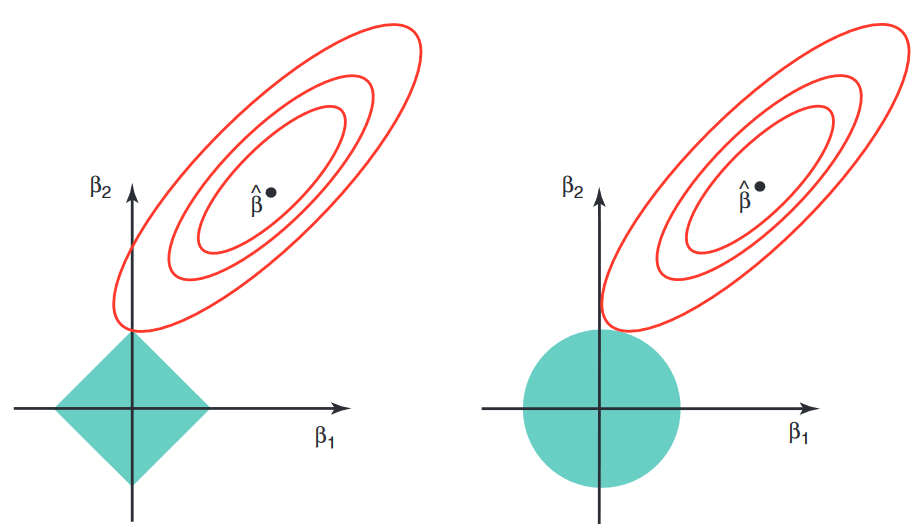

Source: https://stats.stackexchange.com/questions/866/when-should-i-use-lasso-vs-ridge


In [14]:
# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

In [15]:
# Fit Lasso with cross-validation
lasso = LassoCV(cv=5, alphas=[0.01, 0.1, 0.5], random_state=42)
lasso.fit(X_scaled, y_train.values.ravel())
lasso_coef = pd.Series(lasso.coef_, index=X_numeric.columns)

# Fit Ridge with cross-validation
ridge = RidgeCV(cv=5, alphas=[0.01, 0.1, 0.5])
ridge.fit(X_scaled, y_train.values.ravel())
ridge_coef = pd.Series(ridge.coef_, index=X_numeric.columns)

In [16]:
# Combine into a DataFrame
coef_df = pd.DataFrame({
    "Lasso Coefficients": lasso_coef,
    "Ridge Coefficients": ridge_coef
})


In [17]:
# Show top non-zero Lasso features
print("Top non-zero Lasso coefficients:")
print(coef_df[coef_df["Lasso Coefficients"] != 0]
      .sort_values(by="Lasso Coefficients", ascending=False)
      )

Top non-zero Lasso coefficients:
             Lasso Coefficients  Ridge Coefficients
grade                    0.1800              0.1792
lat                      0.1781              0.1884
m2_living                0.1384              0.0694
age                      0.0712              0.1239
m2_living15              0.0641              0.0733
view                     0.0485              0.0505
ncult                    0.0440              0.0495
bathrooms                0.0386              0.0475
condition                0.0303              0.0409
waterfront               0.0279              0.0353
floors                   0.0097              0.0227
m2_lot                   0.0059              0.0229
dist_stop               -0.0042             -0.0140
zipcode                 -0.0114             -0.0360


In [18]:
print(coef_df[coef_df["Lasso Coefficients"] == 0])

                 Lasso Coefficients  Ridge Coefficients
const                        0.0000              0.0000
bedrooms                     0.0000             -0.0087
long                        -0.0000             -0.0128
since_renovated              0.0000             -0.0390
m2_above                     0.0000              0.0608
m2_basement                  0.0000              0.0303
m2_lot15                     0.0000             -0.0057


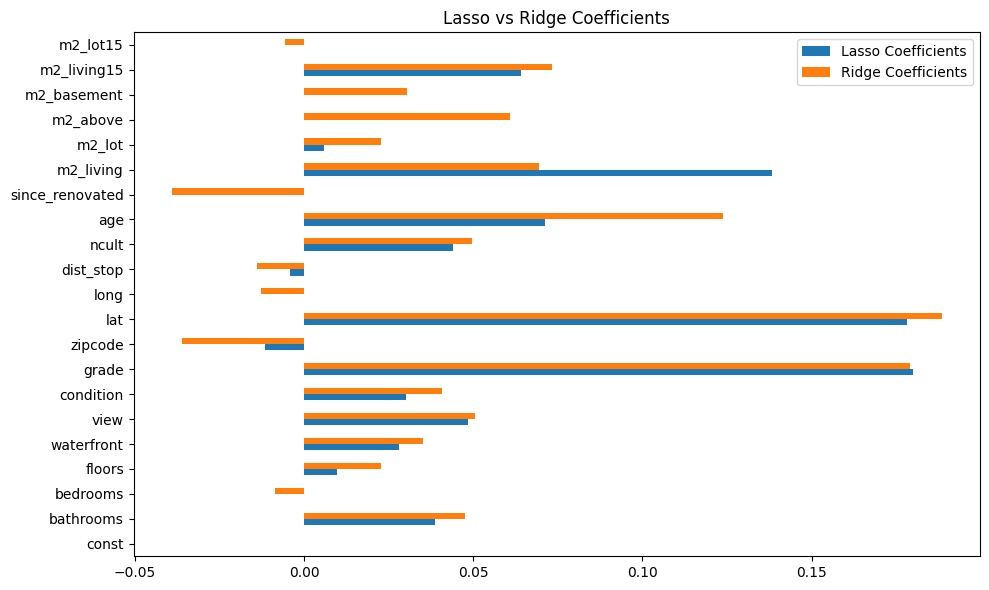

In [19]:
coef_df.plot(kind='barh', figsize=(10, 6), title="Lasso vs Ridge Coefficients")
plt.tight_layout()
plt.show()


### 🔍 **Embedded Methods: Tree Importance**

In [20]:
# Fit a Random Forest
forest = RandomForestRegressor(n_estimators=50, random_state=42)
forest.fit(X_numeric, y_train.values.ravel())

# Get feature importances
rf_importances = pd.Series(forest.feature_importances_, index=X_numeric.columns)
rf_importances = rf_importances.sort_values(ascending=True)


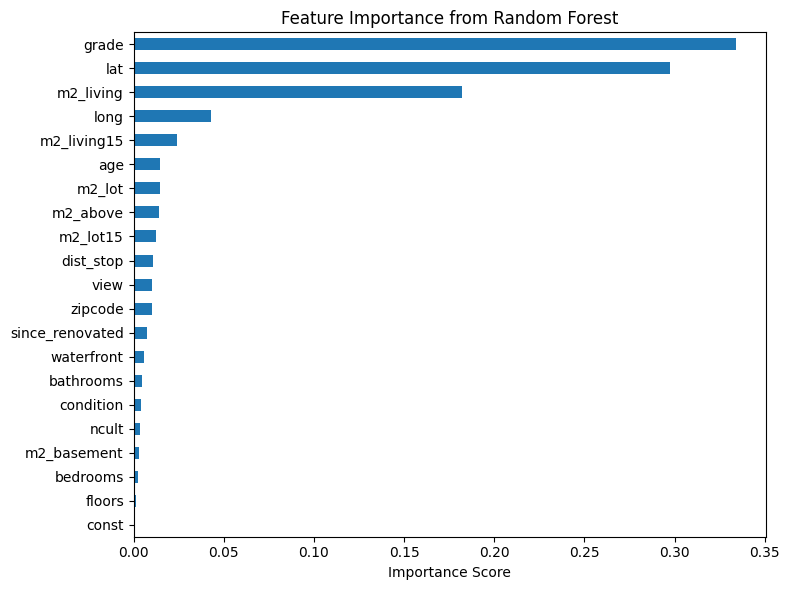

In [21]:
plt.figure(figsize=(8, 6))
rf_importances.plot(kind='barh')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

**Filtering out the redundant features**

In [22]:
X_train["m2_ratio"] = X_train["m2_above"]/(X_train["m2_basement"]+0.1)
X_test["m2_ratio"] = X_test["m2_above"]/(X_test["m2_basement"]+0.1)

# Omitting zipcode 
X_train = X_train.drop(["zipcode", "m2_basement", "m2_above", "since_renovated", "long", "lat"], axis=1)
X_test = X_test.drop(["zipcode", "m2_basement", "m2_above", "since_renovated", "long", "lat"], axis=1)

In [23]:
# Store the names of categorical and numeric features separately for future steps 
numeric_features = [col_name for col_name in X_train.columns if col_name != "district_name"]
categorical_features = ['district_name']

## 📌 **Model fitting with Scikit-Learn**

### 🚀 **Linear regression** - the baseline model

- **Manual Approach**

In [25]:
# Step 1: One-hot encode categorical variables 
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

X_cat = pd.DataFrame(
    one_hot_encoder.fit_transform(X_train[categorical_features]),
    columns=one_hot_encoder.get_feature_names_out(categorical_features)

)

In [26]:
# Step 2: Combine with numeric features
X_train_one_hot = pd.concat([X_train[numeric_features], X_cat], axis=1)

In [27]:
# Step 3: Fit linear regression
lr = LinearRegression()
lr.fit(X_train_one_hot, y_train)

LinearRegression()

- **Modular Approach with Scikit-Learn Pipelines** 🚀 

In [28]:
# Step 1: Preprocessor with ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')  # Keep numeric columns unchanged

# Step 2: Full pipeline
pipeline_lr = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Step 3: Fit model
pipeline_lr.fit(X_train, y_train)

# Step 4: View coefficients (flattening the coefficients array)
feature_names = pipeline_lr.named_steps['preprocess'].get_feature_names_out()
coef_array = pipeline_lr.named_steps['model'].coef_.ravel()
coef_df = pd.Series(coef_array, index=feature_names)
# print(coef_df)


In [29]:
# Or if you would like to obtain R-similar output, use statsmodels 
import statsmodels.api as sm

# Step 1. Add a constant term to capture the intercept
X_train_const = sm.add_constant(X_train_one_hot)

# Step 2. Fit the model using Ordinary Least Squares (OLS)
ols_model = sm.OLS(y_train.values.ravel(), X_train_const).fit()

# Step 3. Print the summary, which includes coefficients, standard errors, and p-values
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2155.
Date:                Tue, 15 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:26:02   Log-Likelihood:                -390.83
No. Observations:               15005   AIC:                             831.7
Df Residuals:                   14980   BIC:                             1022.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### 🚀 **Decision Trees**

**Decision Trees are versatile Machine Learning algorithms that**:

  - make few assumptions about the training data, unlike linear models.
  - if unconstrained, they tend to fit the data too closely, leading to **overfitting**.
  - known as **nonparametric models** because the number of parameters is not fixed prior to training, allowing the structure to adapt freely to the data.

**Regularization**:  
  - To avoid overfitting, **regularization** is needed.
  - The primary choice is to manipulate the `max_depth` hyperparameter.
  - Default `max_depth` is **None**, meaning no limit (unrestricted depth).
  - Reducing `max_depth` helps **regularize the model** and lowers overfitting risk.

**Other Decision Tree Parameters**:
  - `min_samples_split`: Minimum number of samples a node must have before it can split.
  - `min_samples_leaf`: Minimum number of samples required at a leaf node.
  - `min_weight_fraction_leaf`: Similar to `min_samples_leaf`, but expressed as a fraction of total weighted samples.
  - `max_leaf_nodes`: Maximum number of leaf nodes
  - `max_features`: Maximum number of features that are evaluated for splitting at each node. 
  


In [44]:
# Step 1: Create a preprocessor 
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Step 2: Build a pipeline combining the preprocessor and the decision tree model.
pipeline_dt = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(random_state=777))
])

# Step 3: Define a hyperparameter grid for the Decision Tree.
param_grid = {
    'model__max_depth': [3, 5, 7],
    'model__min_samples_leaf': [500, 700, 1000]
}

# Step 4: Set up GridSearchCV with 5-fold cross-validation.
grid_search = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

# Retrieve best estimator and parameters.
best_pipeline = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Optionally, inspect cross-validation scores.
cv_scores = -grid_search.cv_results_['mean_test_score']
print("Mean CV MSE:", np.mean(cv_scores))

Best Parameters: {'model__max_depth': 7, 'model__min_samples_leaf': 500}
Mean CV MSE: 0.1212149650627985


In [45]:
tree_model = best_pipeline.named_steps['model']
feature_names = best_pipeline.named_steps['preprocess'].get_feature_names_out()
X_train_transformed = best_pipeline.named_steps['preprocess'].transform(X_train)

The trees with higher depth usually are not readable. 

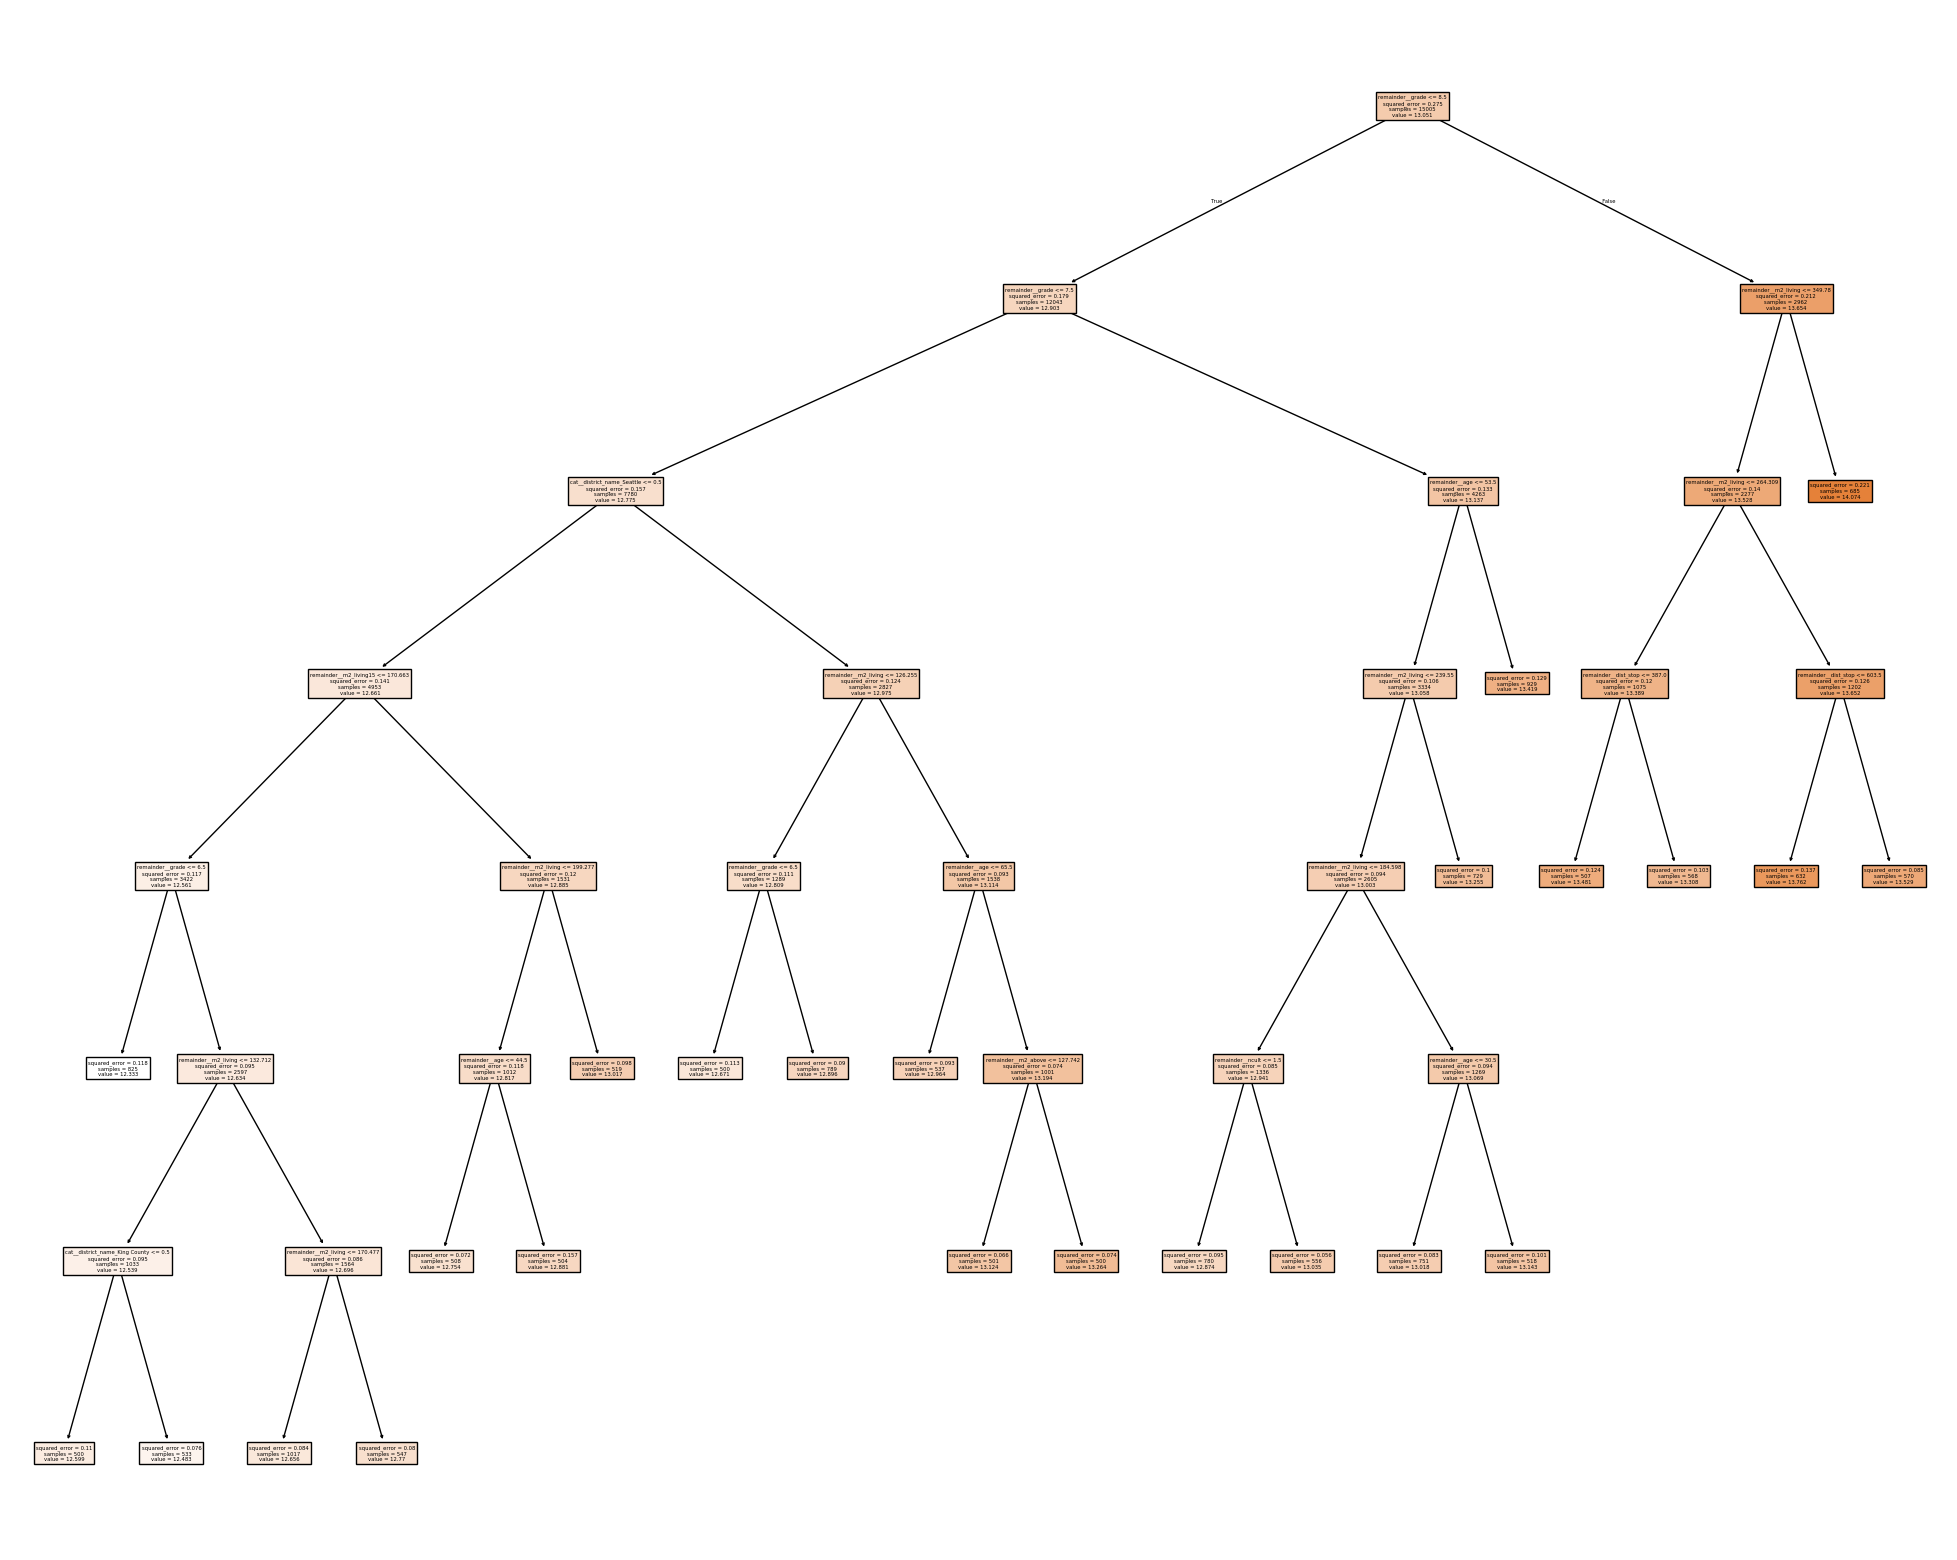

In [46]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model,
                   feature_names=feature_names,
                   filled=True)

### 🚀 **Visualizing Decision Trees with dtreeviz**

In [47]:
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

In [48]:
# %% Decision Tree Visualization using dtreeviz (Fixed Version)
from dtreeviz import model as dtreeviz_model

# Ensure y_train is a 1D array (or Series) with the proper numeric dtype.
# If y_train is a DataFrame, convert it to a numpy array.
if isinstance(y_train, pd.DataFrame):
    y_train_viz = y_train.values.ravel()
else:
    y_train_viz = y_train

# Create and display the visualization using the new dtreeviz API.
viz = dtreeviz_model(
    tree_model,            # your trained decision tree model
    X_train_transformed,   # preprocessed data used to train the tree
    y_train_viz,           # target variable, now as a 1D array
    feature_names=feature_names,  # list of feature names matching the preprocessed data
    target_name="price_log"       # target variable's name
)


In [84]:
# horizontally oriented vie of the tree 
# viz.view(orientation="LR") 

# limit the depth to be shown 
# viz.view(depth_range_to_display=(0, 2))

In [50]:
print("Available feature names in the shadow tree:")
print(viz.shadow_tree.feature_names)


Available feature names in the shadow tree:
['cat__district_name_Federal Way' 'cat__district_name_Kent'
 'cat__district_name_King County' 'cat__district_name_Kirkland'
 'cat__district_name_Mercer Island' 'cat__district_name_Renton'
 'cat__district_name_Sammamish' 'cat__district_name_Seattle'
 'cat__district_name_Shoreline' 'remainder__bathrooms'
 'remainder__bedrooms' 'remainder__floors' 'remainder__waterfront'
 'remainder__view' 'remainder__condition' 'remainder__grade'
 'remainder__dist_stop' 'remainder__ncult' 'remainder__age'
 'remainder__since_renovated' 'remainder__m2_living' 'remainder__m2_lot'
 'remainder__m2_above' 'remainder__m2_living15' 'remainder__m2_lot15']


In [51]:
# Convert shadow_tree.feature_names to a list to enable indexing
viz.shadow_tree.feature_names = list(viz.shadow_tree.feature_names)

In [ ]:
# prediction path explanations 
x = X_train.iloc[100]
x


bathrooms            1.5000
bedrooms                  3
floors               1.0000
waterfront                0
view                      0
condition                 3
grade                     7
dist_stop          509.0000
ncult                0.0000
age                      39
since_renovated          39
m2_living          147.7158
m2_lot             627.0952
m2_above           100.3352
m2_living15        147.7158
m2_lot15           687.4822
district_name      Kirkland
Name: 100, dtype: object

In [82]:
# Show the preiction path for one observation
# viz.view(x = X_train_transformed[100])


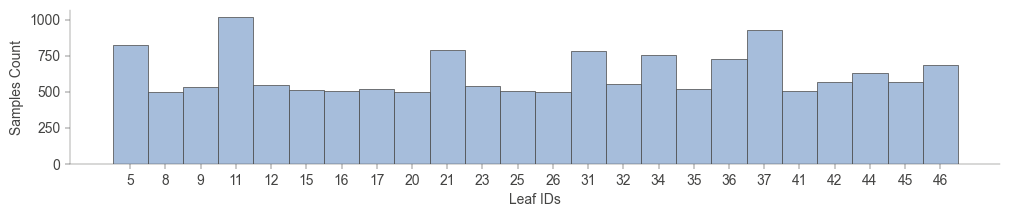

In [65]:
viz.leaf_sizes(figsize=(12,2))

In [71]:
# print out stats per each node
viz.node_stats(node_id=1)

,cat__district_name_Federal Way,cat__district_name_Kent,cat__district_name_King County,cat__district_name_Kirkland,cat__district_name_Mercer Island,cat__district_name_Renton,cat__district_name_Sammamish,cat__district_name_Seattle,cat__district_name_Shoreline,remainder__bathrooms,...,remainder__grade,remainder__dist_stop,remainder__ncult,remainder__age,remainder__since_renovated,remainder__m2_living,remainder__m2_lot,remainder__m2_above,remainder__m2_living15,remainder__m2_lot15
count,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,...,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000,12043.0000
mean,0.0364,0.0419,0.3677,0.0429,0.0068,0.0493,0.0268,0.3440,0.0352,1.9276,...,7.2041,619.3951,2.8794,48.5178,46.2253,166.3805,1186.1665,140.9457,164.9872,1028.0056
std,0.1872,0.2004,0.4822,0.2027,0.0822,0.2166,0.1616,0.4751,0.1843,0.6669,...,0.7109,1563.9408,6.2692,28.9204,28.6111,57.8160,3326.1404,50.6136,44.2209,2158.2349
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,1.0000,0.0000,0.0000,0.0000,26.9419,53.1405,26.9419,42.7354,61.2231
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.5000,...,7.0000,159.0000,0.0000,26.0000,23.0000,122.7249,459.7305,104.0514,132.8513,464.5150
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,...,7.0000,293.0000,1.0000,48.0000,46.0000,160.7222,682.8370,130.8074,158.8641,690.6409
75%,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,2.5000,...,8.0000,569.0000,3.0000,67.0000,64.0000,202.5285,910.4494,168.1544,193.2382,886.5269
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,7.5000,...,8.0000,44907.0000,85.0000,115.0000,115.0000,441.2892,153416.2052,441.2892,416.2054,40711.3023


In [85]:
# viz.rtree_feature_space(features=['remainder__m2_living'])

In [86]:
# Now call the rtree_feature_space method for features 'grade' and 'floors'
# viz.rtree_feature_space(features=['remainder__m2_living', 'remainder__grade'])

In [87]:
# viz.rtree_feature_space3D(features=['remainder__grade', 'remainder__m2_living'],
#                                  fontsize=10,
#                                  elev=30, azim=20,
#                                  show={'splits', 'title'},
#                                  colors={'tessellation_alpha': .5})

### 🚀 **Automated modelling & report with MLJAR**

In [55]:
from supervised.automl import AutoML

# Define the path where MLJAR will save results and reports.
results_path = "../reports/decision_tree_explainer"

# Configure AutoML:
# - mode="Explain" ensures that MLJAR generates a detailed explanation report.
# - algorithms=["Decision Tree"] restricts the search to Decision Trees only.
automl = AutoML(
    results_path=results_path,
    mode="Explain",             # or "Compete" for a more competitive experiment
    algorithms=["Decision Tree"],
    explain_level = 2
)

# Fit the model using your training data (X_train, y_train).
automl.fit(X_train, y_train)

# After training is finished, MLJAR saves a detailed HTML report in the results_path folder,
# usually named something like "report.html". Open that file in your browser to see the details.

print("MLJAR AutoML run is complete. Please check the '{}' folder for the report.".format(results_path))


AutoML directory: ../reports/decision_tree_explainer
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Decision Tree']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_DecisionTree rmse 0.357835 trained in 3.15 seconds
Skip default_algorithms because no parameters were generated.
* Step ensemble will try to check up to 1 model
AutoML fit time: 3.56 seconds
AutoML best model: 1_DecisionTree
MLJAR AutoML run is complete. Please check the '../reports/decision_tree_explainer' folder for the report.


### 🔍 **Decision Trees: Summary**

#### 💡 Model Interpretatability

Decision Trees are deemed to be **White Box** models as they are fairly intuitive and their decisions are easy to interpret. 

In contrast, as we will see, Random Forests or neural networks are generally considered **Black Box** models. They make great predictions, and you can easily check the calculations that they performed
to make these predictions; nevertheless, it is usually hard to explain in simple terms
why the predictions were made.


#### 🟢    Advantages

- A Decision Tree **does not require** scaling of data
- Compared to other models, a Decision Tree requires less preparation of data (missing values in the data do not prevent the Decision Tree from making decisions)
- Exploratory Data Analysis → Decision Trees can identify feature importance
- Easy to interpret and explain

#### 🟠 Disadvantages

- Prone to **overfitting**
- A lot of feature engineering may be required in order to optimize Decision Tree model
- A single Decision Tree is usually **a weak learner**. Therefore, a Random Forest (made up of many Decision Trees) is often a better predictor.

## 📌 **CV evaluation and dumping the models with Joblib**

In [ ]:
# Set up 5-fold cross-validation with shuffling and a fixed random state for reproducibility.
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate using cross_val_score with negative mean squared error as the scoring metric.
# Note: When using "neg_mean_squared_error", lower values are better (hence we take the negative).
lr_cv_scores = cross_val_score(pipeline_lr, X_train, y_train.values.ravel(),
                               cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)

dt_cv_scores = cross_val_score(best_pipeline, X_train, y_train.values.ravel(),
                               cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)

# Convert negative MSE to RMSE.
lr_rmse_scores = np.sqrt(-lr_cv_scores)
dt_rmse_scores = np.sqrt(-dt_cv_scores)

print("Cross-validated RMSE scores for Linear Regression:", lr_rmse_scores)
print("Mean CV RMSE:", lr_rmse_scores.mean())

print("\n Cross-validated RMSE scores for Decision Tree:", dt_rmse_scores)
print("Mean CV RMSE:", dt_rmse_scores.mean())

Cross-validated RMSE scores for Linear Regression: [0.24856318 0.25256668 0.24752004 0.24888092 0.24311794]
Mean CV RMSE: 0.24812975284513641

 Cross-validated RMSE scores for Decision Tree: [0.3253309  0.33565769 0.33842614 0.33274332 0.32602396]
Mean CV RMSE: 0.33163640202314437


In [92]:
import joblib
joblib.dump(pipeline_lr, "../models/linear_regression_pipeline.joblib")
joblib.dump(best_pipeline, "../models/decision_tree_pipeline.joblib")


['../models/decision_tree_pipeline.joblib']

## 📌 **Next steps: ensemble learning**

Ensemble methods work best when the predictors are as independent from one another as possible. 

- One way to get diverse classifiers
is to train them using very different algorithms. This increases the
chance that they will make very different types of errors, improving
the ensemble’s accuracy.
- Another approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set. 
  - Sampling with replacement:  **bagging** (i.e. bootstrap aggregating).
  - Sampling without replacement: **pasting**.

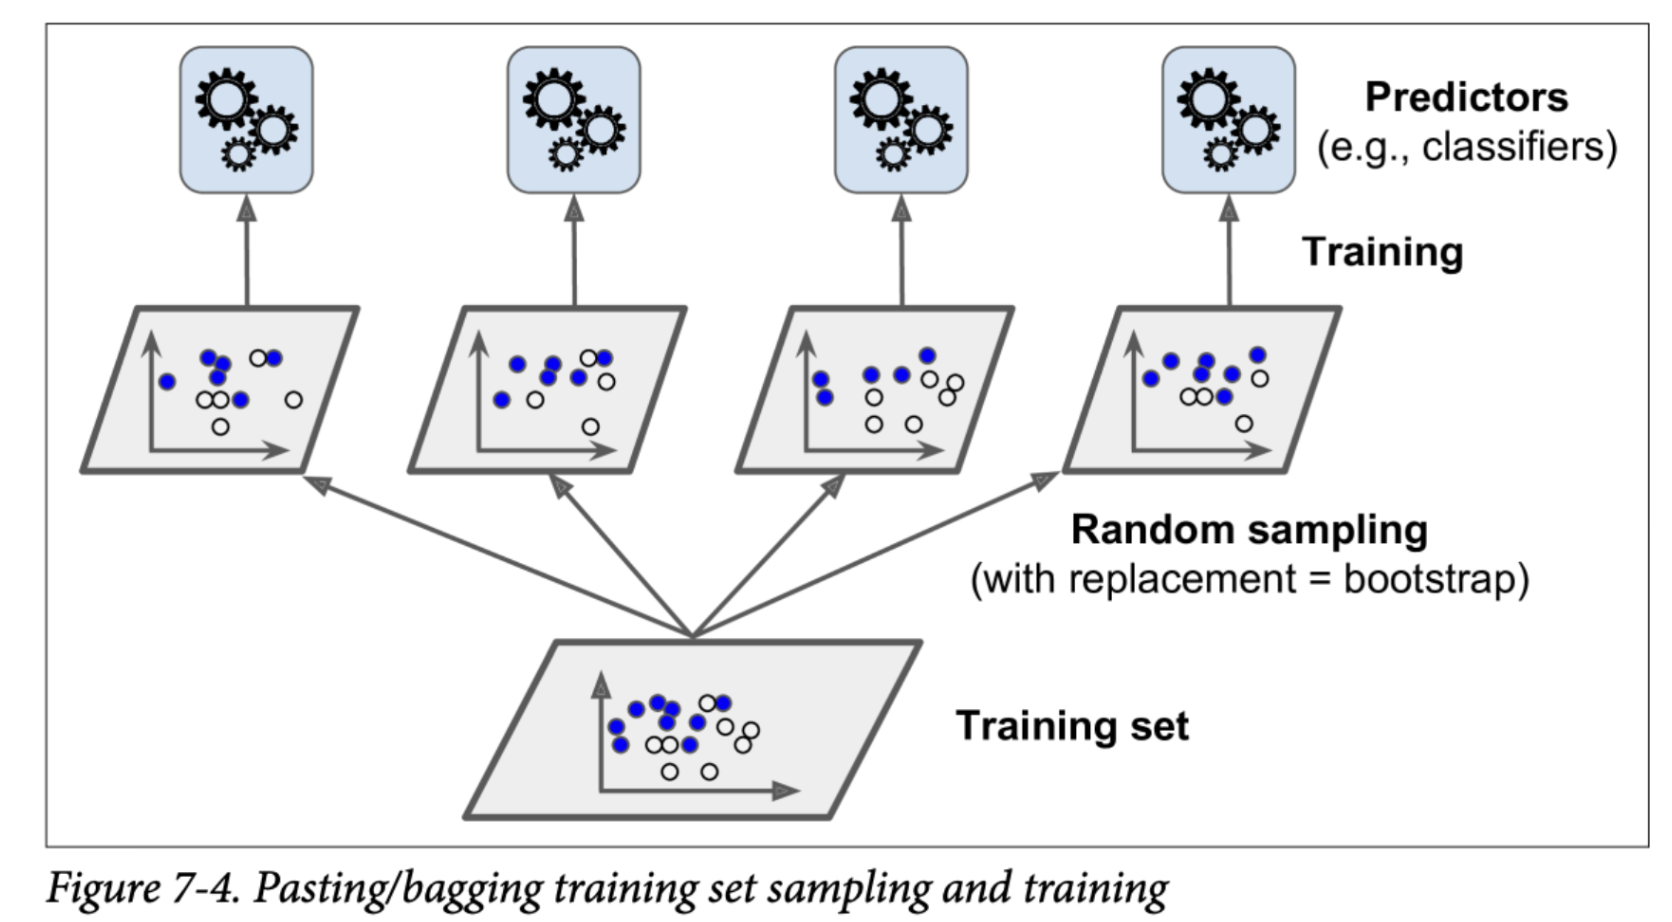

Source: Géron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow (p. 195). O'Reilly Media, Inc.

### 🚀 **Random Forest**

Random Forest is an ensemble of Decision Trees, generally
trained via the **bagging** method (or sometimes pasting), typically with `max_samples`
set to the size of the training set.

The aggregation function is typically the statistical mode (i.e., the most frequent prediction, just like a
hard voting classifier) for classification, or the average for regression.

